# Workflow de um projeto para problemas de **Classificação**: 

- Instrutor: Lucca de Sena Barbosa
- Instituição: UNIPÊ - Centro Universitário

### **Entendimento e Preparação dos Dados - Analista de Dados**

### **1. Abordar o problema e Analisar:**

- Desenvolver um modelo de machine learning que consiga prever se um paciente possui diabetes.

###  **2. Obter os dados:**

In [28]:
# Manipulação e Geração de Dados
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sn

# Bibliotecas de Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [33]:
df = pd.read_csv("data/heartDiseaseData/dataset_clinico_realista.csv")
df

,Unnamed: 0,idade,genero,imc,glicemia,hba1c,insulina,atividade_fisica,historico_familiar,pressao_arterial,colesterol_total,triglicerideos,diagnostico
0,0,30,Masculino,21.8,153,4.9,24.9,4,0,153,133,249,Não diabético
1,1,66,Feminino,19.3,108,5.2,19.1,7,0,99,276,67,Pré-diabetes
2,2,69,Masculino,21.0,255,6.0,9.9,3,0,121,189,195,Diabetes Tipo 1
3,3,37,Masculino,24.7,87,7.1,27.3,4,0,110,181,282,Não diabético
4,4,76,Feminino,21.2,110,5.5,24.4,2,0,90,184,92,Pré-diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,83,Feminino,18.0,116,5.2,22.2,7,1,124,236,297,Pré-diabetes
9996,9996,29,Masculino,23.5,249,5.5,8.0,4,0,168,250,90,Não diabético
9997,9997,33,Masculino,21.0,94,5.4,9.1,3,0,157,191,145,Não diabético
9998,9998,47,Feminino,32.0,89,6.9,20.4,2,0,168,171,137,Não diabético


### **3. Explorar os dados:**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   idade               10000 non-null  int64  
 2   genero              10000 non-null  object 
 3   imc                 10000 non-null  float64
 4   glicemia            10000 non-null  int64  
 5   hba1c               10000 non-null  float64
 6   insulina            10000 non-null  float64
 7   atividade_fisica    10000 non-null  int64  
 8   historico_familiar  10000 non-null  int64  
 9   pressao_arterial    10000 non-null  int64  
 10  colesterol_total    10000 non-null  int64  
 11  triglicerideos      10000 non-null  int64  
 12  diagnostico         10000 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


### **4. Tratamento dos dados:**

In [35]:
df = df.drop(columns=['Unnamed: 0'])

### **Modelagem e Avaliação do Modelo - Cientista de Dados**

### **5. Separar Base de Dados em Arrays:**

In [36]:
x_data = df.iloc[:, 0:11].values
y_data = df.iloc[:, 11].values

x_data, y_data

(array([[30, 'Masculino', 21.8, ..., 153, 133, 249],
        [66, 'Feminino', 19.3, ..., 99, 276, 67],
        [69, 'Masculino', 21.0, ..., 121, 189, 195],
        ...,
        [33, 'Masculino', 21.0, ..., 157, 191, 145],
        [47, 'Feminino', 32.0, ..., 168, 171, 137],
        [87, 'Masculino', 14.2, ..., 175, 256, 208]],
       shape=(10000, 11), dtype=object),
 array(['Não diabético', 'Pré-diabetes', 'Diabetes Tipo 1', ...,
        'Não diabético', 'Não diabético', 'Não diabético'],
       shape=(10000,), dtype=object))

### **6. Técnicas de Pré-processamento:**

In [37]:
encoder_cat = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1])], remainder='passthrough')

In [38]:
scaler = StandardScaler()

In [39]:
preprocessor = Pipeline(steps=[
                                ('Encoder', encoder_cat),
                                ('Scaler', scaler)
                            ]
                        )

In [40]:
x_data = preprocessor.fit_transform(x_data)
x_data

array([[-1.00060018,  1.00060018, -0.83647116, ...,  0.70909404,
        -1.43205265,  1.02693914],
       [ 0.99940018, -0.99940018,  0.72896077, ..., -1.35685242,
         1.65708907, -1.4933812 ],
       [-1.00060018,  1.00060018,  0.85941344, ..., -0.51517053,
        -0.22231883,  0.27915179],
       ...,
       [-1.00060018,  1.00060018, -0.7060185 , ...,  0.86212711,
        -0.17911405, -0.41324391],
       [ 0.99940018, -0.99940018, -0.09723941, ...,  1.28296806,
        -0.61116185, -0.52402722],
       [-1.00060018,  1.00060018,  1.6421294 , ...,  1.55077593,
         1.22504127,  0.45917467]], shape=(10000, 12))

### **7. Dividir Base de Dados entre Treino e Teste:**

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

### **8. Definir vários modelos e aplicar Treinamento:**


In [42]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [44]:
modelTree = DecisionTreeClassifier()
modelTree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### **9. Validação do Modelo:**

In [46]:
def PerformanceMetrics(y_true, predict, class_name):

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)


    # Imprime a Acurácia:
    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

#### 9.1 Logistic Regression:

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 68.55%.
O modelo identificou corretamente 328 registros com o rótulo 'Diabetes Tipo 1'.
O modelo identificou corretamente 258 registros com o rótulo 'Diabetes Tipo 2'.
O modelo identificou corretamente 476 registros com o rótulo 'Pré-diabetes'.
O modelo identificou corretamente 309 registros com o rótulo 'Não diabético'.


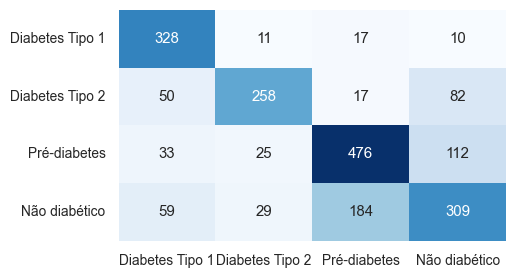

In [47]:
predictLogistic = modelLogistic.predict(x_test) 

PerformanceMetrics(y_test, predictLogistic, ['Diabetes Tipo 1', 'Diabetes Tipo 2', 'Pré-diabetes', 'Não diabético'])

#### 9.2 Naive Bayes:

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 70.15%.
O modelo identificou corretamente 334 registros com o rótulo 'Diabetes Tipo 1'.
O modelo identificou corretamente 263 registros com o rótulo 'Diabetes Tipo 2'.
O modelo identificou corretamente 386 registros com o rótulo 'Pré-diabetes'.
O modelo identificou corretamente 420 registros com o rótulo 'Não diabético'.


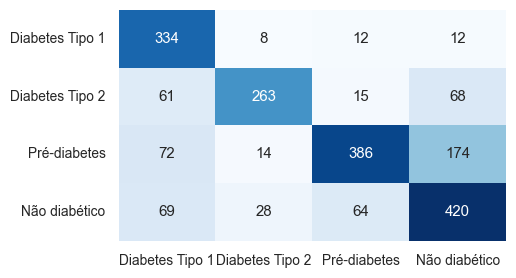

In [48]:
predictNB = modelNB.predict(x_test) 

PerformanceMetrics(y_test, predictNB, ['Diabetes Tipo 1', 'Diabetes Tipo 2', 'Pré-diabetes', 'Não diabético'])

#### 9.3 Decision Tree Classifier:

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 84.40%.
O modelo identificou corretamente 297 registros com o rótulo 'Diabetes Tipo 1'.
O modelo identificou corretamente 329 registros com o rótulo 'Diabetes Tipo 2'.
O modelo identificou corretamente 556 registros com o rótulo 'Pré-diabetes'.
O modelo identificou corretamente 506 registros com o rótulo 'Não diabético'.


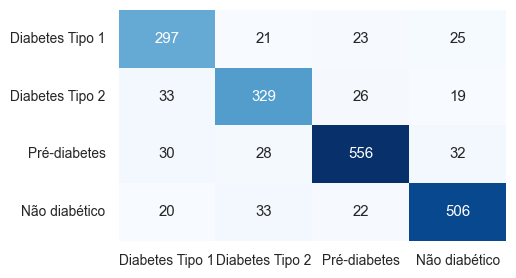

In [49]:
predictTree= modelTree.predict(x_test) 

PerformanceMetrics(y_test, predictTree, ['Diabetes Tipo 1', 'Diabetes Tipo 2', 'Pré-diabetes', 'Não diabético'])

#### 9.4 Random Forest Classifier

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 92.70%.
O modelo identificou corretamente 330 registros com o rótulo 'Diabetes Tipo 1'.
O modelo identificou corretamente 361 registros com o rótulo 'Diabetes Tipo 2'.
O modelo identificou corretamente 614 registros com o rótulo 'Pré-diabetes'.
O modelo identificou corretamente 549 registros com o rótulo 'Não diabético'.


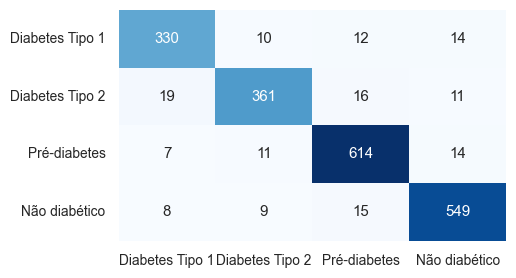

In [50]:
predictRF = modelRF.predict(x_test) 

PerformanceMetrics(y_test, predictRF, ['Diabetes Tipo 1', 'Diabetes Tipo 2', 'Pré-diabetes', 'Não diabético'])

### **10. Salvar o melhor modelo:**

In [51]:
import joblib

joblib.dump(modelRF, "modelRF.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']